<a href="https://colab.research.google.com/github/shivam251/Basic/blob/gh-pages/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imporing the dependency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Importing the bosten house dataset


In [2]:
house_df=sklearn.datasets.load_boston()

In [3]:
house_df

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

## loading the dataset to the pandas dataframe

In [4]:
house_price_df=pd.DataFrame(data=house_df.data,columns=house_df.feature_names)

In [5]:
#print the first 5 row in the dataframe
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
#add the target column in the dataframe
house_price_df['target']=house_df.target

In [8]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#check the row and columns using shape function
house_price_df.shape

(506, 14)

In [10]:
# check the missing value in the dataframe
house_price_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [11]:
# statistical measure(mean,medium and mode) of the dataframe
house_price_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##understanding the correlation between the various features
Correlation ->mean ralation between two features

1 Positive Correlation-> positive correlation means if one variable increase then second bvariable also be increase.

2 Negative correlation-> negative correlation means if one variable value discreas second value also be discreas.

In [12]:
# Positive correlation and negative correlation
correlation=house_price_df.corr()

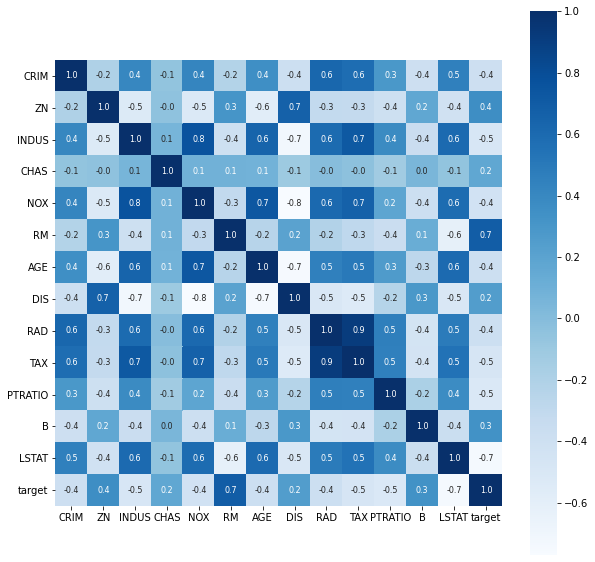

In [13]:
# Constructing the heatmap to undesstan the correlation
#heat map are mostly used to analysing the correaltion bteween various features
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


Splitting the data and Target

In [14]:
X=house_price_df.drop(columns='target',axis=1)
Y=house_price_df['target']

In [15]:
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

Splitting the data into Training ans Testing data

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [18]:
print(X_train.shape,X_test.shape)

(404, 13) (102, 13)


Model Training using 

XGBoost Regression

In [19]:
#loading the model
model=XGBRegressor()

In [20]:
#train the model with X_train
model.fit(X_train,Y_train)

[16:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Evaluation

In [21]:
# accuracy of the prediction on training data
predict=model.predict(X_train)

In [22]:
print(predict)

[13.089375  20.40358   34.865578  12.759732  20.555647  21.121927
 21.60305   49.222137  23.333227  12.017431  15.654226  23.909939
 22.839727  19.220776  30.62124   30.147558  17.094893  25.106855
 15.803615   9.601468  14.14324   20.803173  18.348804  17.565132
 18.534122  34.85426   13.694284  21.457788  24.055841  22.516788
 14.771399  26.542053  21.487946  15.613354  22.12447    8.382286
 18.03797   26.114843  14.224697  24.289152  26.484947  20.926237
 15.635306  47.176632  14.30772   28.11718   17.066889  18.846447
 17.394964  22.960344  20.110144  14.749781  43.44264   38.71851
 23.35814   20.048332  47.49224   30.58915   16.005833  15.814797
 20.906572  24.735857  20.779016  18.769989  23.77601   14.222286
 20.598984  24.427637  33.579655  40.776913  34.647137  23.265387
 16.318792  22.484138  34.93119   22.978197  10.675105  21.374153
 32.75246   14.7426405  8.7741    24.296177  20.92528   17.66608
 46.035885  23.423857  13.9124155 20.599289  18.247345  45.942165
 29.41767   

In [24]:
# R square error
score_1=metrics.r2_score(Y_train,predict)

In [25]:
print(score_1)

0.974069051487105


In [27]:
#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,predict)

In [28]:
print(score_2)

1.1321915867305037


predict on the test data accuracy

In [29]:
test_predict=model.predict(X_test)

In [30]:
score_3=metrics.r2_score(Y_test,test_predict)

In [31]:
print(score_3)

0.9361605882750579


In [32]:
score_4=metrics.mean_absolute_error(Y_test,test_predict)

In [33]:
print(score_4)

1.7291853979522105


Visualization the actual price and predicted price

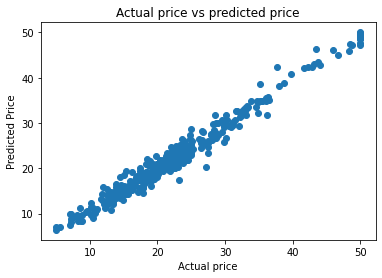

In [34]:
plt.scatter(Y_train,predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()